## Author
Przemysław Szymczak

## The Data source:
A subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club modified by Jose Marcial Portilla from Pierian Data Inc.

## Goal:
Training of a model that can predict if the borrower will pay back their loan based on historical data on loans with information about default.


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("muted")

In [3]:
loans = pd.read_csv("lending_club_loan_two.csv")

## Variables in dataset:

In [5]:
dataset_variables = pd.read_csv("lending_club_info.csv")

In [7]:
search = "verification_status"
dataset_variables#[dataset_variables["LoanStatNew"]==search]["Description"].values[0]

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [9]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Data preprocessing
### Missing Values

<Axes: >

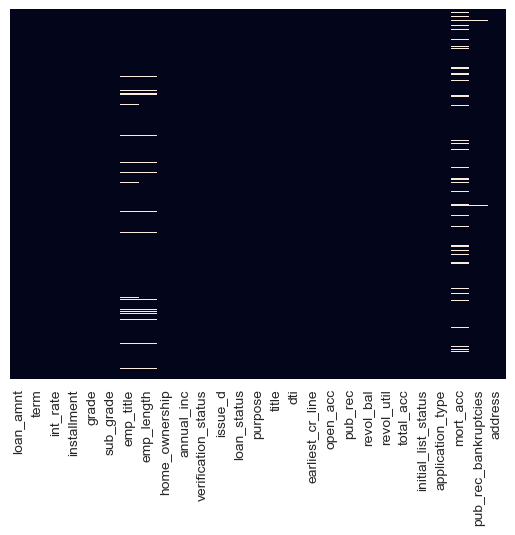

In [13]:
sns.heatmap(loans.isna(), yticklabels=False, cbar=False)

**Mortgage accounts missing values imputation by mean in home_ownership categories.**

<Axes: xlabel='mort_acc', ylabel='loan_amnt'>

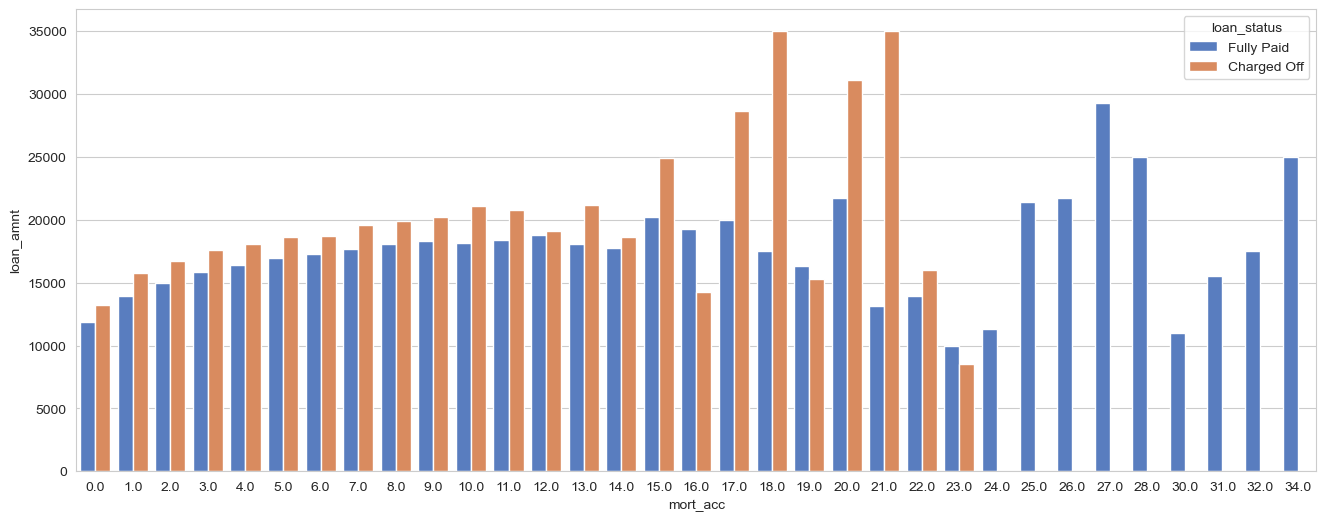

In [15]:
plt.figure(figsize=(16,6))
sns.barplot(x=loans["mort_acc"], y=loans["loan_amnt"], hue=loans["loan_status"], errorbar=None)

<Axes: xlabel='mort_acc', ylabel='count'>

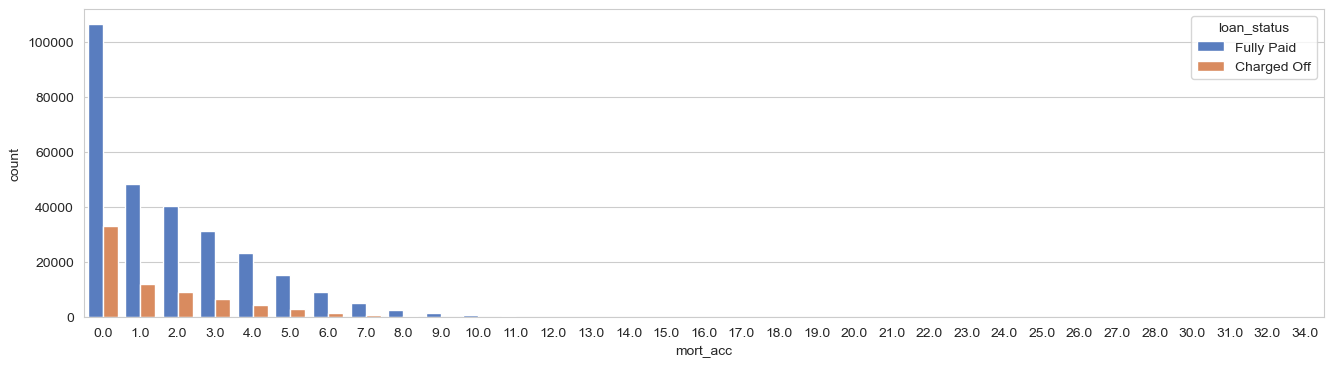

In [19]:
# This variable has a few outliers with values greater than 10.
plt.figure(figsize=(16,4))
sns.countplot(data=loans, x="mort_acc", hue="loan_status")

In [21]:
loans["mort_acc"].mean()

1.8139908160844138

<Axes: xlabel='home_ownership', ylabel='mort_acc'>

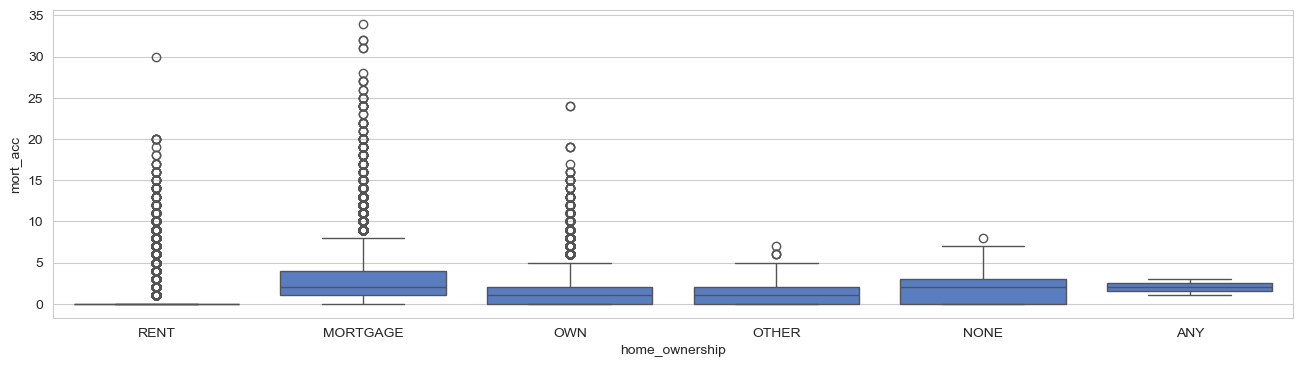

In [23]:
# The average number of mortgage accounts differs in home ownership categories.
plt.figure(figsize=(16,4))
sns.boxplot(data=loans, y="mort_acc", x="home_ownership")

In [25]:
loans.value_counts("home_ownership")

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [27]:
# "None" and "any" are minority categories, so they are included in "other".
loans.loc[(loans["home_ownership"]=="NONE") | (loans["home_ownership"]=="ANY"), "home_ownership"] = "OTHER"

In [29]:
loans.groupby("home_ownership")["mort_acc"].mean()

home_ownership
MORTGAGE    2.823280
OTHER       1.863636
OWN         1.386728
RENT        0.624460
Name: mort_acc, dtype: float64

In [31]:
loans.loc[(loans["home_ownership"]=="MORTGAGE") & (loans["mort_acc"].isna()), "mort_acc"] = 3
loans.loc[(loans["home_ownership"]=="OTHER") & (loans["mort_acc"].isna()), "mort_acc"] = 2
loans.loc[(loans["home_ownership"]=="OWN") & (loans["mort_acc"].isna()), "mort_acc"] = 1
loans.loc[(loans["home_ownership"]=="RENT") & (loans["mort_acc"].isna()), "mort_acc"] = 1

**Employment length imputation based on annual income (with regression model)**

In [33]:
loans["emp_length"] = loans[loans["emp_length"].isna()==False]["emp_length"].apply(lambda x: int(str(x)[:2].replace("<", "0").strip()))

<Axes: xlabel='emp_length', ylabel='count'>

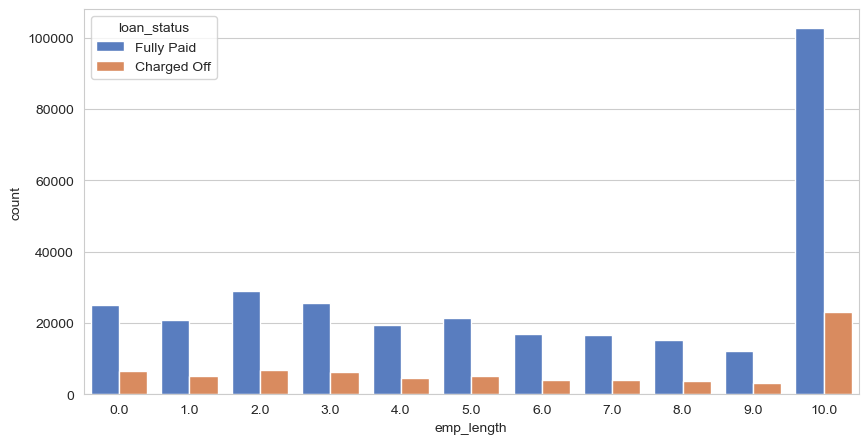

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=loans, x="emp_length", hue="loan_status")

<Axes: xlabel='emp_length', ylabel='loan_status'>

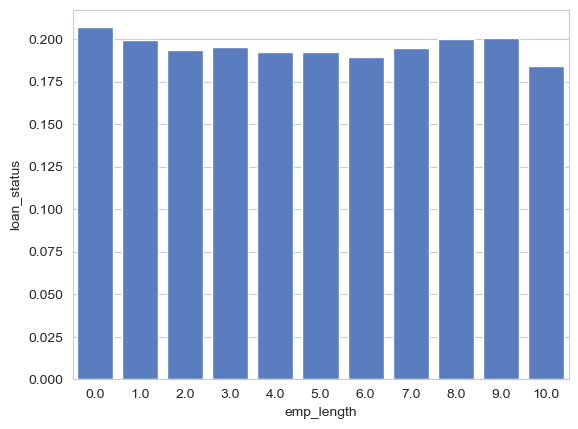

In [37]:
# There are some differences in the % of charged off loans along employment length.
sns.barplot(loans[loans["loan_status"]=="Charged Off"].groupby("emp_length")["loan_status"].count()/loans.groupby("emp_length")["loan_status"].count())

In [39]:
loans.value_counts("emp_length")

emp_length
10.0    126041
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: count, dtype: int64

In [41]:
# Annual income is higher the longer the employment.
loans.groupby("emp_length")["annual_inc"].mean().round(2).sort_values()

emp_length
0.0     69194.40
1.0     69700.71
2.0     71768.22
4.0     72788.31
3.0     72862.78
5.0     73185.42
6.0     73610.05
7.0     74013.64
8.0     75466.54
9.0     75514.54
10.0    81262.89
Name: annual_inc, dtype: float64

In [43]:
loans["annual_inc"].std()

61637.62115809617

In [45]:
from sklearn.linear_model import LinearRegression

<Axes: xlabel='annual_inc', ylabel='Count'>

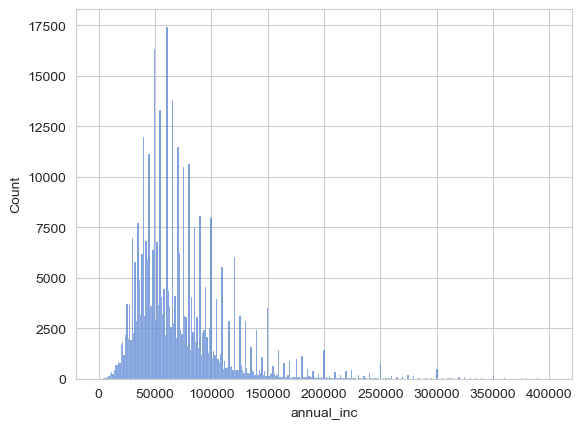

In [47]:
# Most observations are gathered below 200K income.
sns.histplot(loans[loans["annual_inc"]<400000]["annual_inc"])

In [49]:
X_lm = pd.DataFrame(loans[(loans["emp_length"].isna() == False) & (loans["annual_inc"]<=200000)]["annual_inc"])
y_lm = loans[(loans["emp_length"].isna() == False) & (loans["annual_inc"]<=200000)]["emp_length"]

In [51]:
lm = LinearRegression(fit_intercept=True)
lm.fit(np.log(X_lm), y_lm)
print(lm.intercept_)
print(lm.coef_[0])

-6.716865677817255
1.1439049621662791


In [ ]:
loans.loc[loans["emp_length"].isna()==True, "emp_length"] = loans[loans["emp_length"].isna()==True]["annual_inc"].apply(lambda x: lm.intercept_ + np.log(x) * lm.coef_[0])
loans.loc[loans["emp_length"]<0, "emp_length"] = 0
loans.loc[loans["emp_length"]>10, "emp_length"] = 10
loans["emp_length"] = loans["emp_length"].round()

**Other variables missing values drop**

In [55]:
loans.drop(loans[loans["pub_rec_bankruptcies"].isna()].index, inplace=True) # only a few NaN values
loans.drop(loans[loans["revol_util"].isna()].index, inplace=True) # only a few NaN values
loans.drop("title", axis=1, inplace=True) # not informative column

### Categorical data transformations

<Axes: xlabel='term', ylabel='count'>

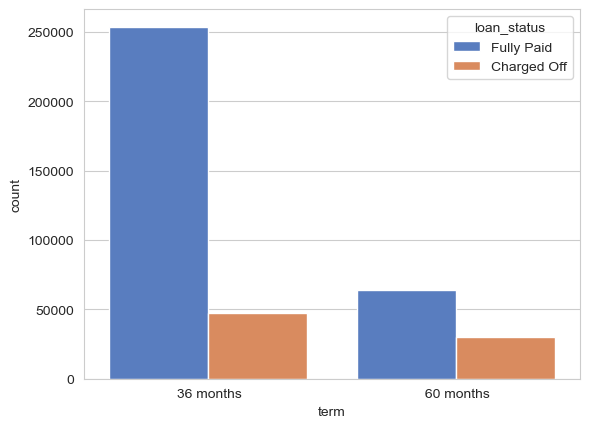

In [57]:
# With longer term there is higher chance of charge off.
sns.countplot(data=loans, x="term", hue="loan_status")

In [59]:
loans.value_counts("term")

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [61]:
loans["term"] = loans["term"].apply(lambda x: int(x[:3]))

In [63]:
loans.drop("grade", axis=1, inplace=True)

In [65]:
# Most borrowers come from B and C grades.
loans.value_counts("sub_grade").sort_values(ascending=False)

sub_grade
B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: count, dtype: int64

In [67]:
subgrades_map = [j+str(i) for j in "A B C D E F G".split() for i in range(1,6)]

<Axes: xlabel='sub_grade', ylabel='count'>

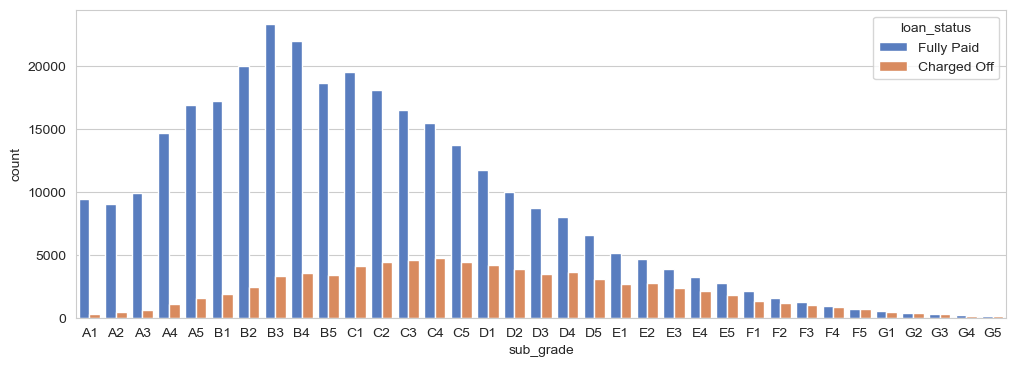

In [69]:
# Better grades (A1) represent a lower chance of loan charge off.
plt.figure(figsize=(12,4))
sns.countplot(data=loans, x="sub_grade", hue="loan_status", order=subgrades_map)

In [71]:
subgrades_map = dict(zip(subgrades_map, range(1,36)))

In [73]:
loans["sub_grade"] = loans["sub_grade"].apply(lambda x: subgrades_map[x])

In [75]:
loans.drop(["emp_title"], axis=1, inplace=True) # not informative variable

In [77]:
loans["earliest_cr_year"] = loans["earliest_cr_line"].apply(lambda x: int(x[-4:]))
loans.drop("earliest_cr_line", axis=1, inplace=True)

<Axes: xlabel='home_ownership', ylabel='count'>

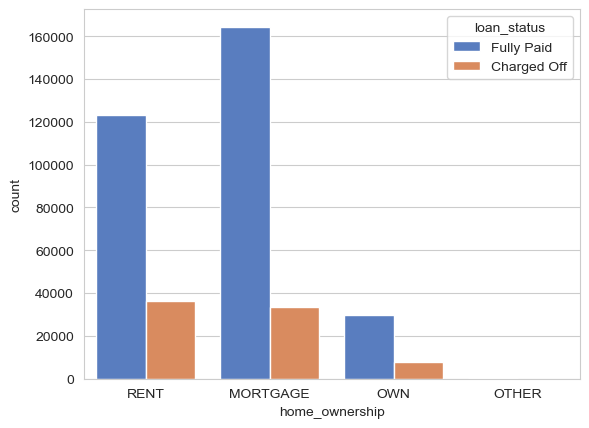

In [79]:
# Borrowers who rent are more likely to be charged off.
sns.countplot(data=loans, x="home_ownership", hue="loan_status")

In [81]:
loans.value_counts("home_ownership")

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

<Axes: xlabel='verification_status', ylabel='count'>

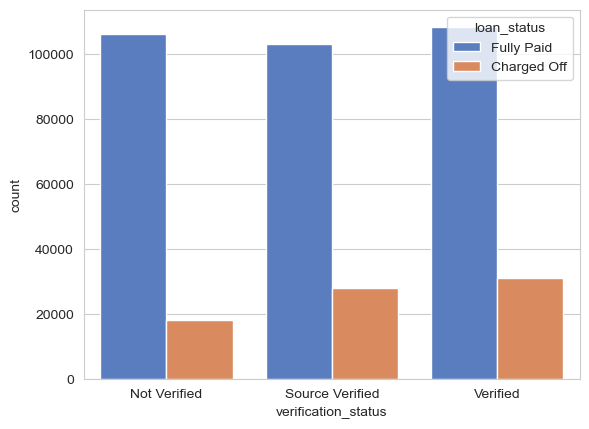

In [83]:
sns.countplot(data=loans, x="verification_status", hue="loan_status")

In [85]:
# Verified income and its source have a higher % of loan charge off.
loans.groupby(["verification_status", "loan_status"])["loan_amnt"].count()

verification_status  loan_status
Not Verified         Charged Off     18203
                     Fully Paid     106264
Source Verified      Charged Off     28198
                     Fully Paid     103103
Verified             Charged Off     31122
                     Fully Paid     108329
Name: loan_amnt, dtype: int64

In [87]:
loans.value_counts("purpose")

purpose
debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: count, dtype: int64

In [89]:
loans.value_counts("initial_list_status")

initial_list_status
f    237346
w    157873
Name: count, dtype: int64

In [91]:
loans.value_counts("application_type")

application_type
INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [93]:
# The dataset contains fewer observations of loan charge off, it's unbalanced.
loans.value_counts("loan_status")

loan_status
Fully Paid     317696
Charged Off     77523
Name: count, dtype: int64

In [95]:
# Binary values for categorical variables.
loans = pd.get_dummies(data=loans, columns=["home_ownership", "verification_status", "purpose", "initial_list_status", "loan_status"], prefix="", prefix_sep="",dtype="int")
loans.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,dti,open_acc,...,moving,other,renewable_energy,small_business,vacation,wedding,f,w,Charged Off,Fully Paid
0,10000.0,36,11.44,329.48,9,10.0,117000.0,Jan-2015,26.24,16.0,...,0,0,0,0,1,0,0,1,0,1
1,8000.0,36,11.99,265.68,10,4.0,65000.0,Jan-2015,22.05,17.0,...,0,0,0,0,0,0,1,0,0,1
2,15600.0,36,10.49,506.97,8,0.0,43057.0,Jan-2015,12.79,13.0,...,0,0,0,0,0,0,1,0,0,1
3,7200.0,36,6.49,220.65,2,6.0,54000.0,Nov-2014,2.60,6.0,...,0,0,0,0,0,0,1,0,0,1
4,24375.0,60,17.27,609.33,15,9.0,55000.0,Apr-2013,33.95,13.0,...,0,0,0,0,0,0,1,0,1,0


In [97]:
loans.drop(["OTHER", "OWN", "Not Verified", "educational", "w", "Fully Paid"], axis=1, inplace=True)

In [99]:
loans.drop(["issue_d", "application_type", "address"], axis=1, inplace=True)

## Data exploration

<Axes: >

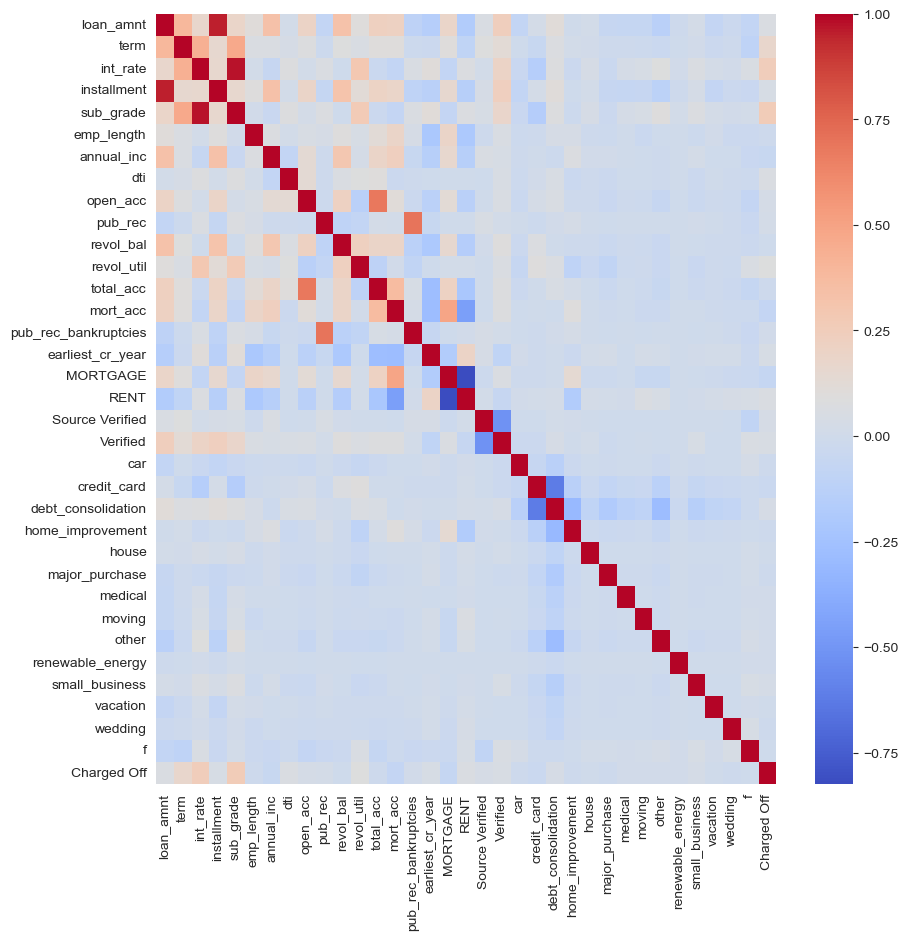

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(loans.corr(), cmap="coolwarm")

In [103]:
# Term, interest rate and subgrades have the highest correlation with label variable.
loans.corr()["Charged Off"].sort_values()

mort_acc               -0.071004
MORTGAGE               -0.067078
annual_inc             -0.053545
credit_card            -0.037582
total_acc              -0.017852
car                    -0.016985
home_improvement       -0.016661
emp_length             -0.015443
wedding                -0.012787
major_purchase         -0.011927
revol_bal              -0.010793
f                      -0.009483
vacation               -0.001301
house                   0.000262
renewable_energy        0.002754
medical                 0.005489
moving                  0.008261
pub_rec_bankruptcies    0.009403
other                   0.009653
pub_rec                 0.019900
open_acc                0.028134
small_business          0.029753
Source Verified         0.033051
debt_consolidation      0.034239
earliest_cr_year        0.038907
installment             0.040936
Verified                0.050251
loan_amnt               0.059731
dti                     0.062390
RENT                    0.063249
revol_util

In [105]:
loans.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'earliest_cr_year', 'MORTGAGE', 'RENT', 'Source Verified', 'Verified',
       'car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'f', 'Charged Off'],
      dtype='object')

<Axes: xlabel='int_rate', ylabel='sub_grade'>

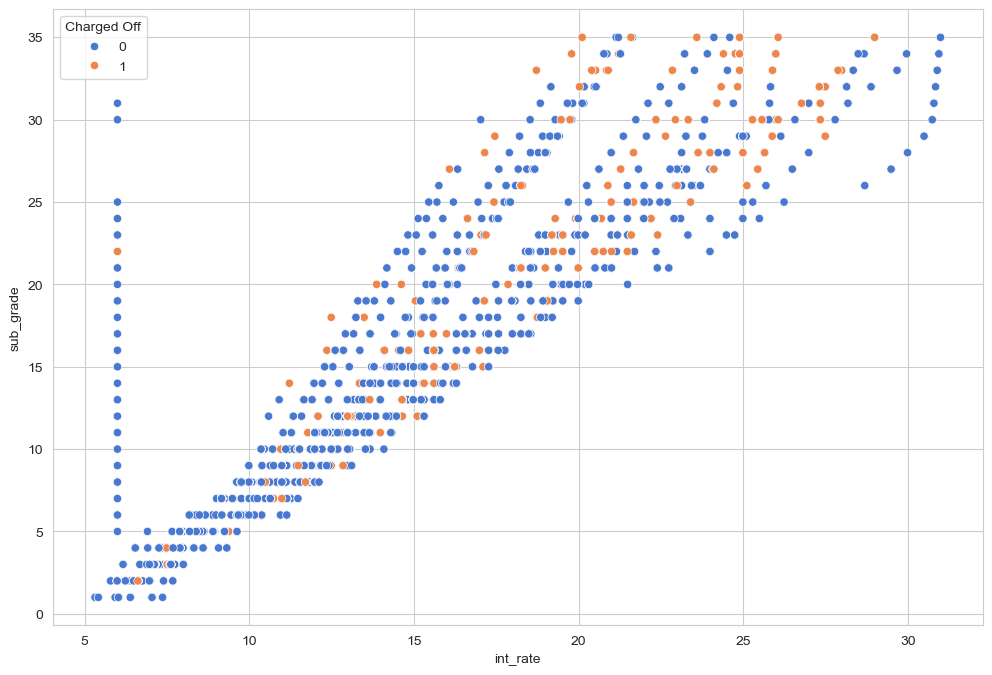

In [107]:
# There is a correlation between interest rate and grade - a worse grade is connected to a higher interest rate.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=loans, x="int_rate", y="sub_grade", hue="Charged Off")

<Axes: xlabel='revol_bal', ylabel='Count'>

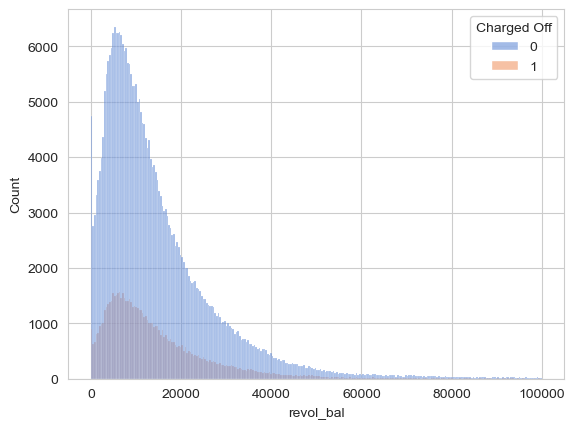

In [109]:
# The distribution of credit revolting balance is similar for paid off and charged off loans.
sns.histplot(data=loans[loans["revol_bal"]<100000], x="revol_bal", hue="Charged Off")

<Axes: xlabel='revol_util', ylabel='Count'>

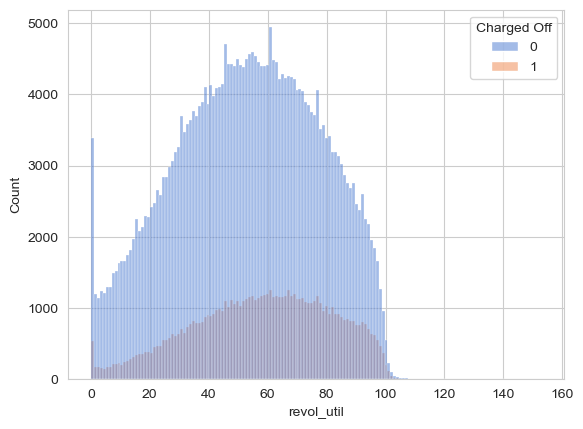

In [111]:
# The distribution of revolving line utilization rate differs for paid off and charged off loans, 
# the higher the value of this variable higher the chance of default.
sns.histplot(data=loans[loans["revol_util"]<200], x="revol_util", hue="Charged Off", )

In [105]:
X = loans.drop("Charged Off", axis=1).values
y = loans["Charged Off"].values

In [107]:
from sklearn.decomposition import PCA

In [109]:
pca = PCA(n_components=3)
pca.fit_transform(X)

array([[ 4.45721375e+04,  1.48209902e+04, -7.96992691e+03],
       [-8.94651934e+03,  4.59698750e+03, -6.26705946e+03],
       [-3.12736605e+04, -3.76011330e+01,  2.98803588e+03],
       ...,
       [-1.61290220e+04,  1.76500564e+04, -1.04347915e+04],
       [-9.81521368e+03,  1.81330711e+03,  7.19153334e+03],
       [-3.28342166e+04, -9.16155638e+03, -9.60898299e+03]])

<Axes: >

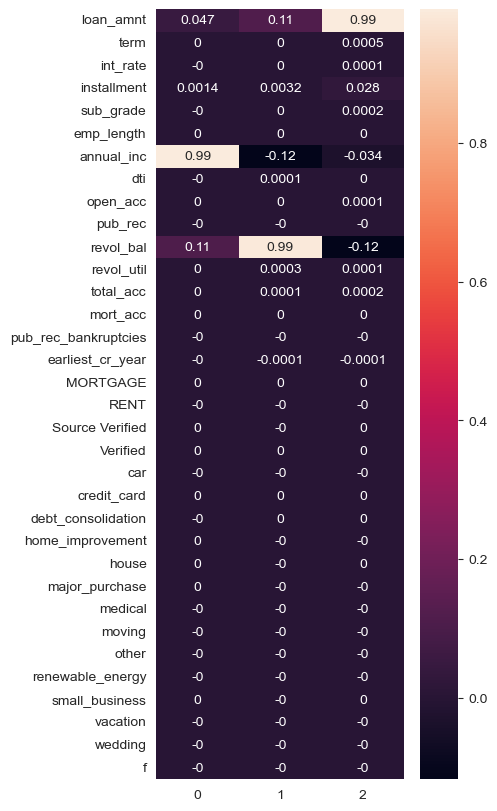

In [113]:
# Only a few variables explain the variance in the dataset.
plt.figure(figsize=(4,10))
sns.heatmap(pd.DataFrame(pca.components_, columns=loans.drop("Charged Off", axis=1).columns).T.round(4), annot=True)

In [115]:
print(pca.explained_variance_ratio_.round(4))
print(pca.explained_variance_ratio_.round(4).sum())

[0.8966 0.09   0.0134]
0.9999999999999999


## Model
### Data scaling

In [127]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, AlphaDropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics

In [133]:
loans.drop("Charged Off", axis=1).columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'earliest_cr_year', 'MORTGAGE', 'RENT', 'Source Verified', 'Verified',
       'car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'f'],
      dtype='object')

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4229)

In [143]:
st_scaler = StandardScaler()
st_X_train = st_scaler.fit_transform(X_train)
st_X_test = st_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_X_train = mm_scaler.fit_transform(X_train)
mm_X_test = mm_scaler.transform(X_test)

[0.1068 0.0801 0.0564]
0.24330000000000002


<Figure size 400x1000 with 0 Axes>

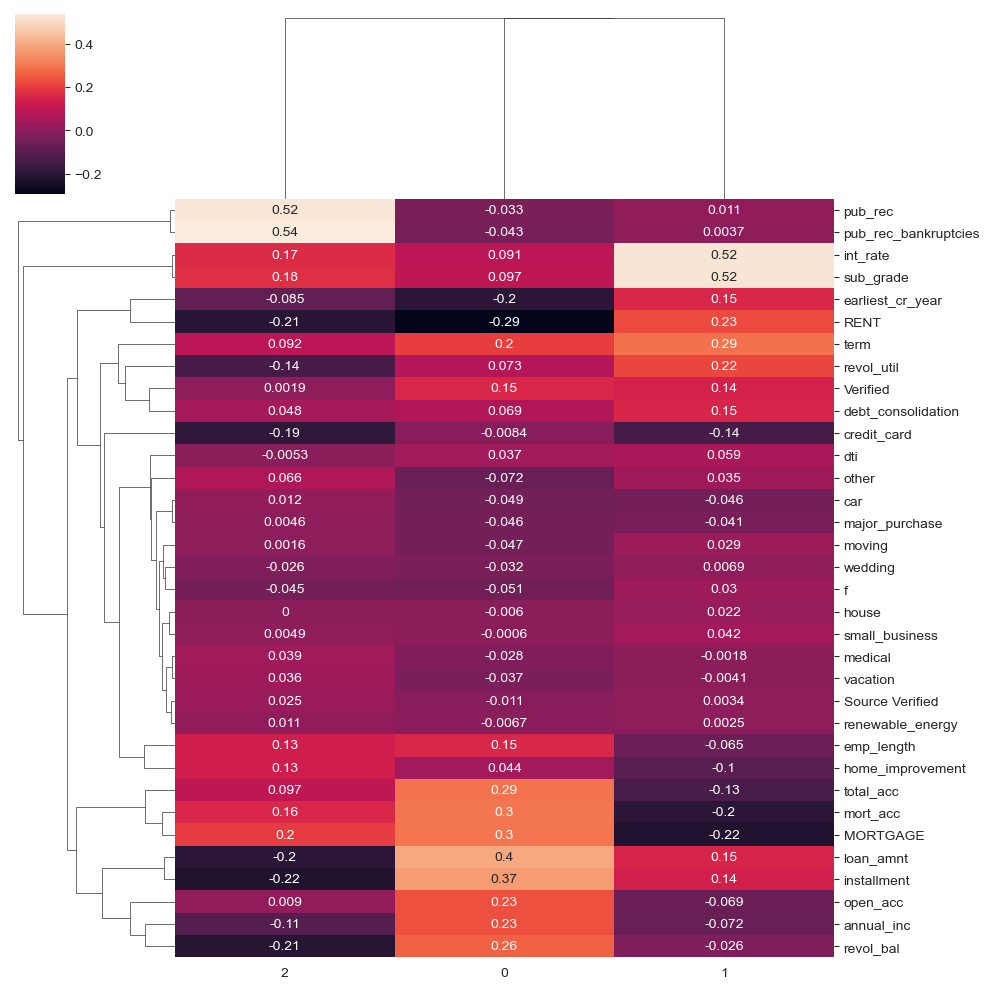

In [149]:
# The first three components define only 24% of the standardised dataset variance.
pca_st = PCA(n_components=3)
pca_st.fit_transform(st_X_train)
plt.figure(figsize=(4,10))
sns.clustermap(pd.DataFrame(pca_st.components_, columns=loans.drop("Charged Off", axis=1).columns).T.round(4), annot=True)
print(pca_st.explained_variance_ratio_.round(4))
print(pca_st.explained_variance_ratio_.round(4).sum())

[0.2067 0.1544 0.1487 0.1081 0.0887]
0.7066


<Figure size 400x1000 with 0 Axes>

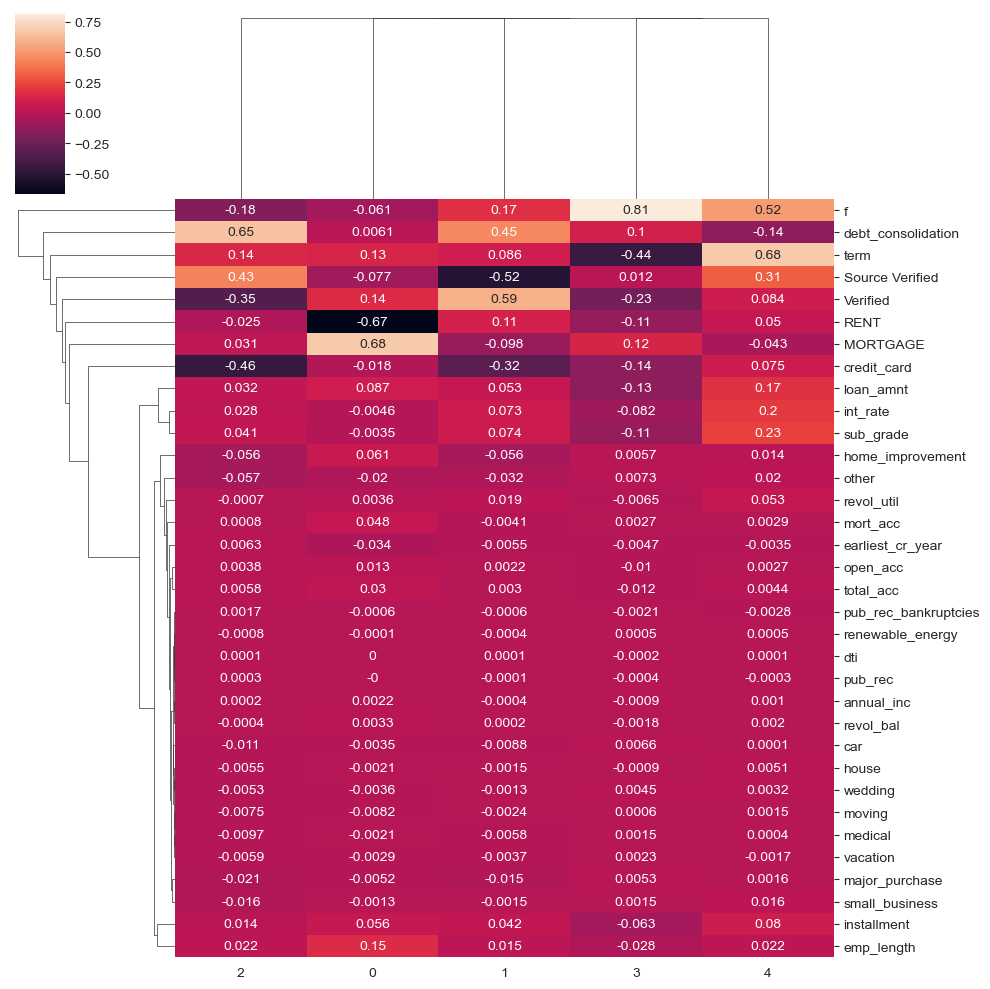

In [151]:
# Five components define only 70% of the MinMax scaled dataset variance.
pca_mm = PCA(n_components=5)
pca_mm.fit_transform(mm_X_train)
plt.figure(figsize=(4,10))
sns.clustermap(pd.DataFrame(pca_mm.components_, columns=loans.drop("Charged Off", axis=1).columns).T.round(4), annot=True)
print(pca_mm.explained_variance_ratio_.round(4))
print(pca_mm.explained_variance_ratio_.round(4).sum())

### Testing of different model settings

In [153]:
optimizers = ["Adam", "AdamW", "Ftrl"]
activation = ["relu", "leaky_relu", "selu"]

early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)

In [202]:
st_models_list = {}
st_models_histories = {}

for opt in optimizers:
    for act in activation:
        print(opt+"_"+act)
        model = Sequential()
        model.add(Dense(36, activation=act))
        model.add(Dropout(rate=0.2))
        model.add(Dense(19, activation=act))
        model.add(Dropout(rate=0.12))
        model.add(Dense(10, activation="relu"))
        model.add(Dense(1, activation="sigmoid"))
        model.compile(optimizer=opt, loss="binary_crossentropy")
        model.fit(st_X_train, y_train, epochs=100, verbose=1, validation_data=(st_X_test, y_test), batch_size=256, callbacks=[early_stop])
        st_models_list[opt+"_"+act] = pd.Series(model.predict(st_X_test).flatten()).apply(lambda x: 1 if x>0.5 else 0)
        st_models_histories[opt+"_"+act] = pd.DataFrame(model.history.history)

Adam_relu
Epoch 1/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4924 - val_loss: 0.4520
Epoch 2/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4546 - val_loss: 0.4507
Epoch 3/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4527 - val_loss: 0.4496
Epoch 4/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4506 - val_loss: 0.4495
Epoch 5/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4510 - val_loss: 0.4490
Epoch 6/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4494 - val_loss: 0.4478
Epoch 7/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4484 - val_loss: 0.4485
Epoch 8/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4499 - val_loss: 0.4494
Epoch 9/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4484 - val_loss: 0.4477
Epoch 10/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4485 - val_loss: 0.4460
Epoch 11/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4476 - val_loss: 0.4468
Epoch 12/

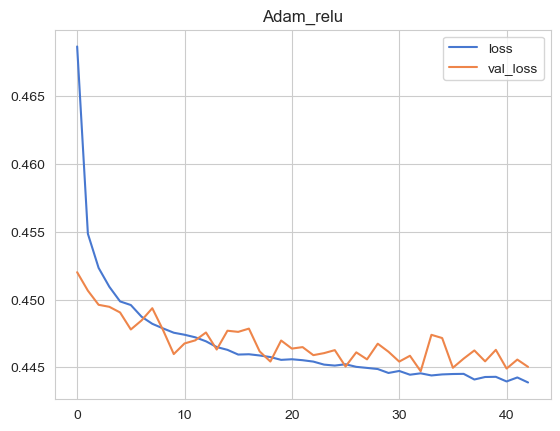

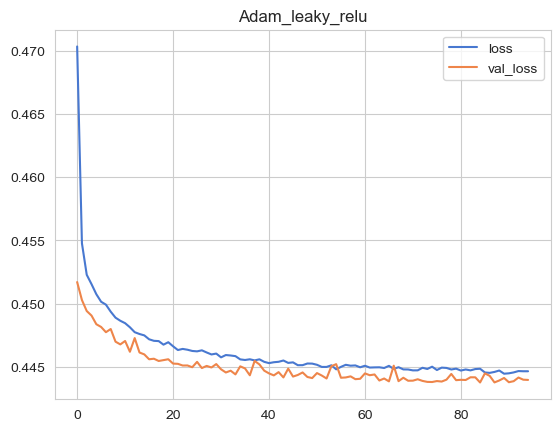

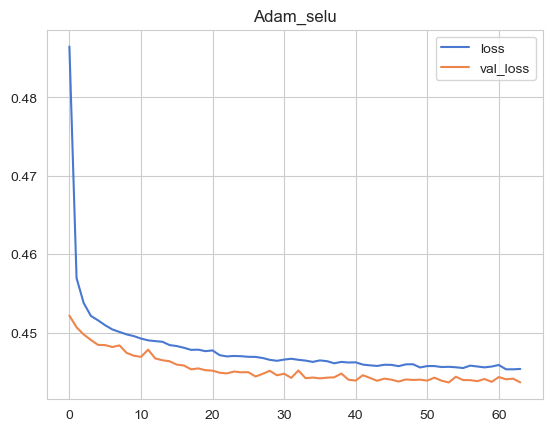

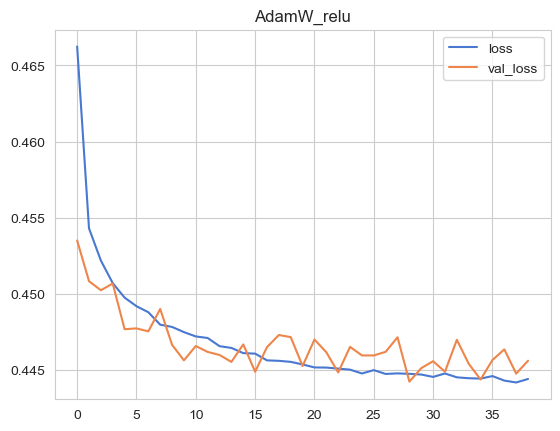

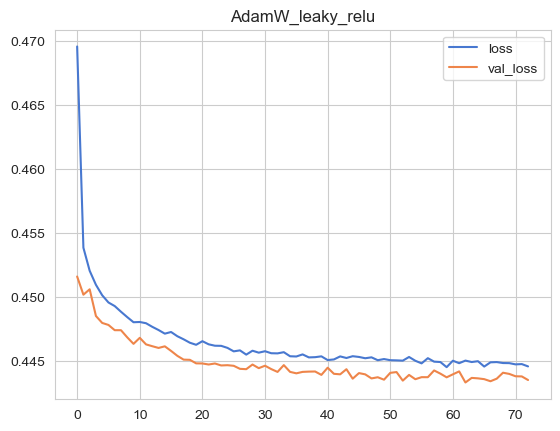

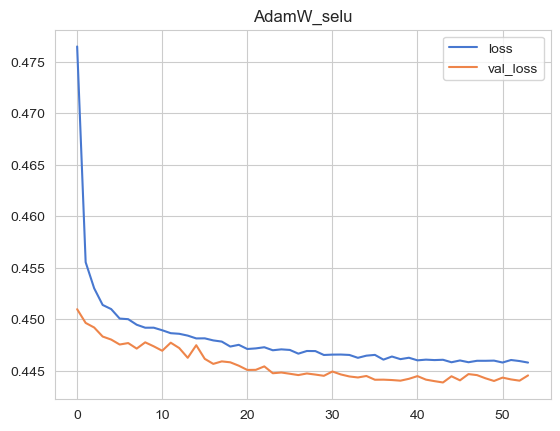

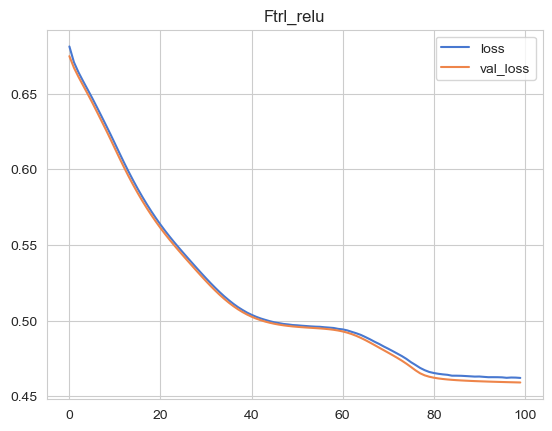

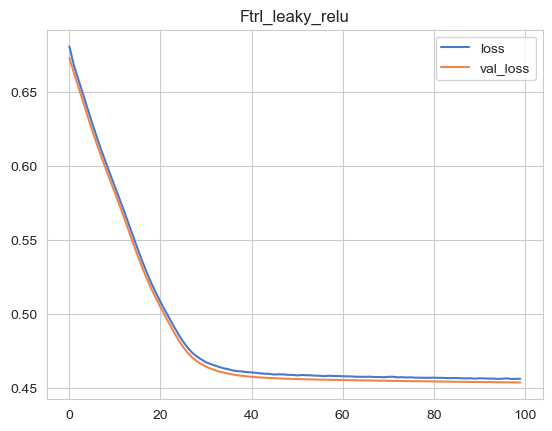

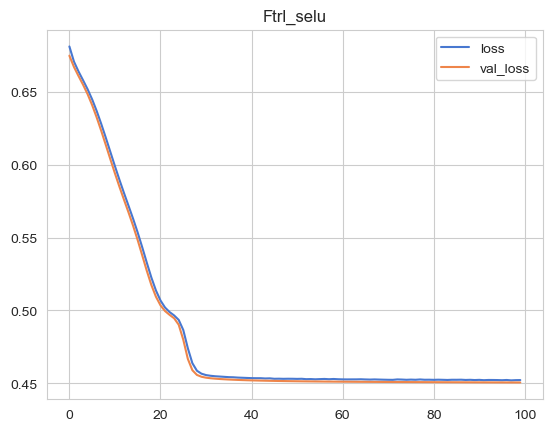

In [236]:
for key in st_models_histories.keys():
    st_models_histories[key].plot()
    plt.title(key)
#best models: Adam_selu, AdamW_leaky_relu, AdamW_selu

In [264]:
for key in st_models_list.keys():
    print(key)
    print("F1:", round(metrics.f1_score(y_test, st_models_list[key]),4))
    print("Pr:", round(metrics.precision_score(y_test, st_models_list[key]),4))
    print("Re:", round(metrics.recall_score(y_test, st_models_list[key]),4))
    print("\n")

# best models: AdamW_relu, AdamW_leakty_relu, AdamW_selu

Adam_relu
F1: 0.1111
Pr: 0.5808
Re: 0.0614


Adam_leaky_relu
F1: 0.1054
Pr: 0.5837
Re: 0.0579


Adam_selu
F1: 0.1032
Pr: 0.5941
Re: 0.0565


AdamW_relu
F1: 0.1732
Pr: 0.5375
Re: 0.1032


AdamW_leaky_relu
F1: 0.1483
Pr: 0.5696
Re: 0.0852


AdamW_selu
F1: 0.1514
Pr: 0.5679
Re: 0.0874


Ftrl_relu
F1: 0.0
Pr: 0.0
Re: 0.0


Ftrl_leaky_relu
F1: 0.0
Pr: 0.0
Re: 0.0


Ftrl_selu
F1: 0.0
Pr: 0.0
Re: 0.0




C:\Users\przem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\przem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\przem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [203]:
mm_models_list = {}
mm_models_histories = {}

for opt in optimizers:
    for act in activation:
        print(opt+"_"+act)
        model = Sequential()
        model.add(Dense(36, activation=act))
        model.add(Dropout(rate=0.2))
        model.add(Dense(19, activation=act))
        model.add(Dropout(rate=0.12))
        model.add(Dense(10, activation="relu"))
        model.add(Dense(1, activation="sigmoid"))
        model.compile(optimizer=opt, loss="binary_crossentropy")
        model.fit(mm_X_train, y_train, epochs=100, verbose=1, validation_data=(mm_X_test, y_test), batch_size=256, callbacks=[early_stop])
        mm_models_list[opt+"_"+act] = pd.Series(model.predict(mm_X_test).flatten()).apply(lambda x: 1 if x>0.5 else 0)
        mm_models_histories[opt+"_"+act] = pd.DataFrame(model.history.history)

Adam_relu
Epoch 1/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4895 - val_loss: 0.4563
Epoch 2/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4581 - val_loss: 0.4550
Epoch 3/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4589 - val_loss: 0.4556
Epoch 4/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4564 - val_loss: 0.4543
Epoch 5/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4546 - val_loss: 0.4549
Epoch 6/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4544 - val_loss: 0.4535
Epoch 7/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4541 - val_loss: 0.4538
Epoch 8/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4545 - val_loss: 0.4525
Epoch 9/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4549 - val_loss: 0.4533
Epoch 10/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4533 - val_loss: 0.4528
Epoch 11/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4534 - val_loss: 0.4528
Epoch 12/

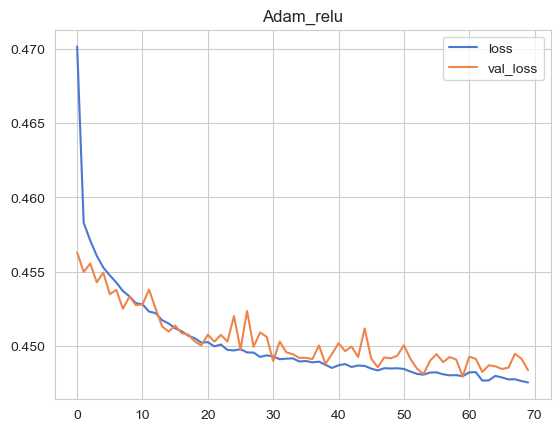

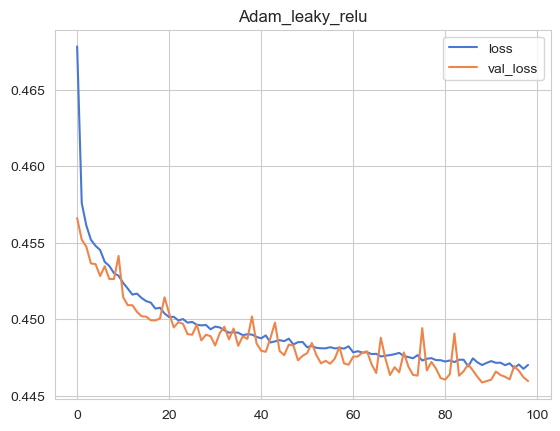

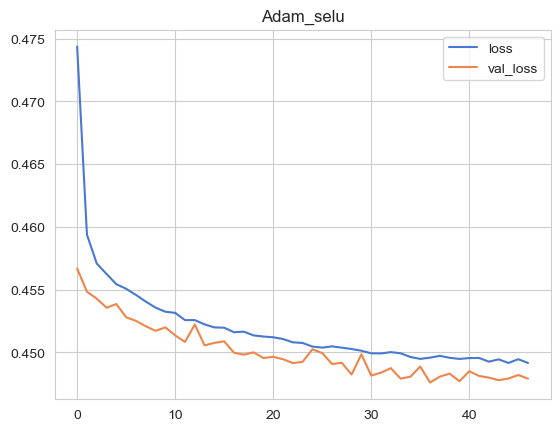

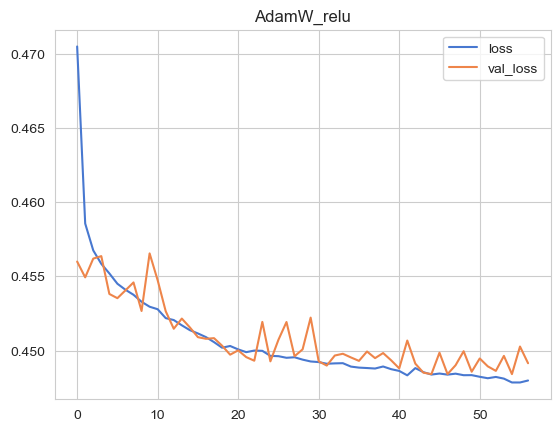

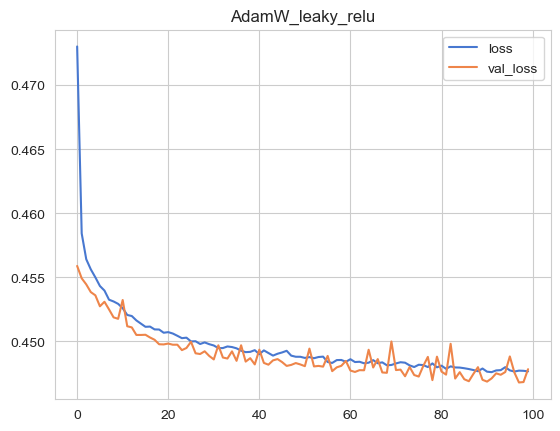

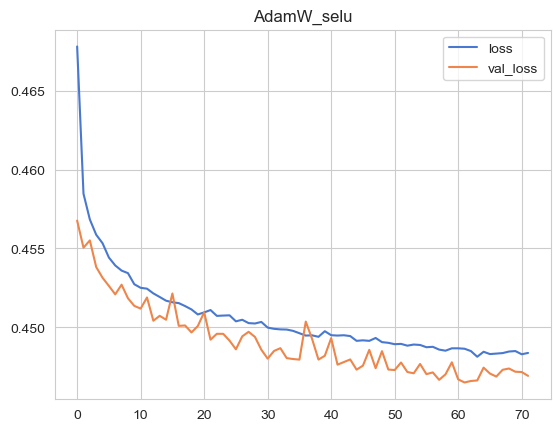

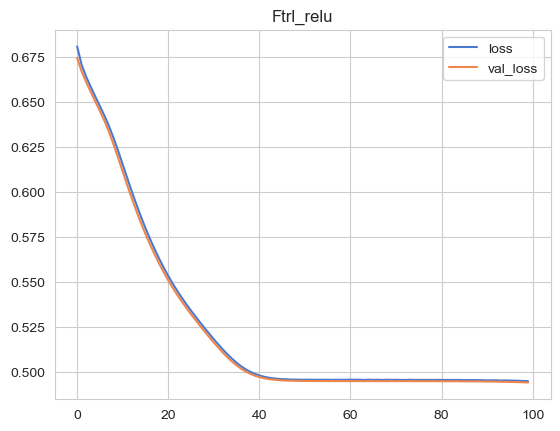

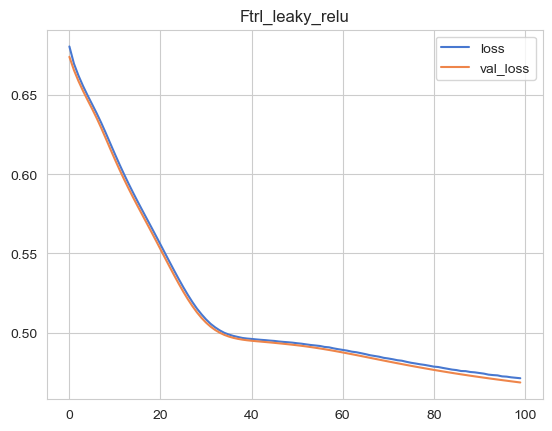

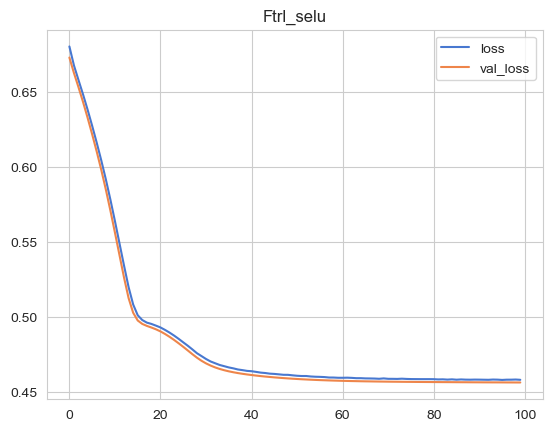

In [238]:
for key in mm_models_histories.keys():
    mm_models_histories[key].plot()
    plt.title(key)
# best models: Adam_selu, AdamW_selu

In [262]:
for key in mm_models_list.keys():
    print(key)
    print("F1:", round(metrics.f1_score(y_test, mm_models_list[key]),4))
    print("Pr:", round(metrics.precision_score(y_test, mm_models_list[key]),4))
    print("Re:", round(metrics.recall_score(y_test, mm_models_list[key]),4))
    print("\n")

# best models: Adam_leaky_relu, AdamW_leaky_relu, AdamW_selu

Adam_relu
F1: 0.0574
Pr: 0.5856
Re: 0.0302


Adam_leaky_relu
F1: 0.1725
Pr: 0.5381
Re: 0.1027


Adam_selu
F1: 0.1022
Pr: 0.5697
Re: 0.0561


AdamW_relu
F1: 0.0737
Pr: 0.5894
Re: 0.0393


AdamW_leaky_relu
F1: 0.1255
Pr: 0.5599
Re: 0.0706


AdamW_selu
F1: 0.111
Pr: 0.5581
Re: 0.0616


Ftrl_relu
F1: 0.0
Pr: 0.0
Re: 0.0


Ftrl_leaky_relu
F1: 0.0
Pr: 0.0
Re: 0.0


Ftrl_selu
F1: 0.0
Pr: 0.0
Re: 0.0




C:\Users\przem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\przem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\przem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Chosen model

**Scaler: StandardScaler**

**Optimizer: AdamW**

**Activation function for first two leyers: selu**

Based on the F1 score and overfitting aspect.

In [155]:
model = Sequential()
model.add(Dense(36, activation="selu"))
model.add(Dropout(rate=0.2))
model.add(Dense(19, activation="selu"))
model.add(Dropout(rate=0.12))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="AdamW", loss="binary_crossentropy")

In [157]:
model.fit(st_X_train, y_train, epochs=100, verbose=1, validation_data=(st_X_test, y_test), batch_size=256, callbacks=[early_stop])

Epoch 1/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.5225 - val_loss: 0.4522
Epoch 2/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4592 - val_loss: 0.4506
Epoch 3/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4552 - val_loss: 0.4496
Epoch 4/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4528 - val_loss: 0.4492
Epoch 5/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4510 - val_loss: 0.4488
Epoch 6/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4504 - val_loss: 0.4484
Epoch 7/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4499 - val_loss: 0.4478
Epoch 8/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4504 - val_loss: 0.4474
Epoch 9/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4496 - val_loss: 0.4477
Epoch 10/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4502 - val_loss: 0.4469
Epoch 11/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4496 - val_loss: 0.4474
Epoch 12/100
1081/1

<Axes: >

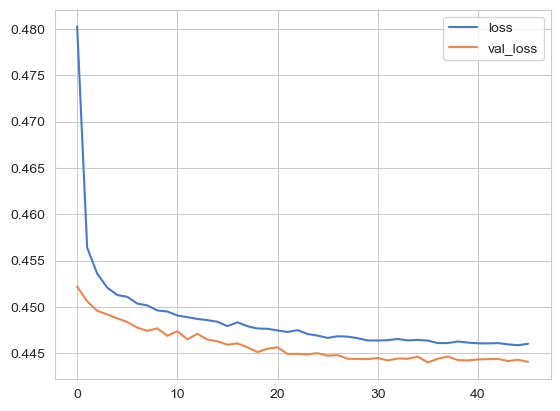

In [159]:
pd.DataFrame(model.history.history).plot()

In [161]:
y_pred = model.predict(st_X_test)
y_pred = pd.Series(y_pred.flatten()).apply(lambda x: 1 if x>0.5 else 0)

3706/3706 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [163]:
print(metrics.confusion_matrix(y_test, y_pred))
print("\n")
print(metrics.classification_report(y_test, y_pred))

[[93667  1671]
 [21076  2152]]


              precision    recall  f1-score   support

           0       0.82      0.98      0.89     95338
           1       0.56      0.09      0.16     23228

    accuracy                           0.81    118566
   macro avg       0.69      0.54      0.53    118566
weighted avg       0.77      0.81      0.75    118566



### Comparison to Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(st_X_train, y_train)
y_pred = forest.predict(st_X_test)

In [169]:
print(metrics.confusion_matrix(y_test, y_pred))
print("\n")
print(metrics.classification_report(y_test, y_pred))

[[93839  1499]
 [21520  1708]]


              precision    recall  f1-score   support

           0       0.81      0.98      0.89     95338
           1       0.53      0.07      0.13     23228

    accuracy                           0.81    118566
   macro avg       0.67      0.53      0.51    118566
weighted avg       0.76      0.81      0.74    118566



**Similar performance with a simpler model.**